In [2]:
#!pip install opencv-python matplotlib albumentations

### Installs and Data Collections

In [1]:
import os
import time
import uuid
import cv2

In [2]:
uuid.uuid1()

UUID('fbbf0041-27af-11ed-b5bd-2811a889e116')

In [3]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30
print(IMAGES_PATH)

data\images


In [6]:
cap = cv2.VideoCapture(0)
print(cap.isOpened())
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(3)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

True


### Annotate Images with Labelme

create annotate images in anacocnda cmd

### Review Dataset and build image loading function

In [4]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

### Limit GPU memory growth

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Load images into TF Data Pipeline

In [8]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)

In [9]:
for i in images.take(3):  #then images are take inside dataset
    print(i.numpy())

b'data\\images\\01bf95ff-2690-11ed-9961-2811a889e116.jpg'
b'data\\images\\04c1db0e-2690-11ed-ad6c-2811a889e116.jpg'
b'data\\images\\07c3e661-2690-11ed-bc3b-2811a889e116.jpg'


In [10]:
images.as_numpy_iterator().next()

b'data\\images\\01bf95ff-2690-11ed-9961-2811a889e116.jpg'

In [11]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images = images.map(load_image)

In [13]:
images.as_numpy_iterator().next()

array([[[ 48,  42,  42],
        [ 50,  44,  44],
        [ 49,  45,  46],
        ...,
        [129, 141, 137],
        [130, 143, 136],
        [130, 143, 136]],

       [[ 49,  43,  43],
        [ 50,  44,  44],
        [ 50,  46,  47],
        ...,
        [130, 142, 138],
        [130, 143, 136],
        [131, 144, 137]],

       [[ 47,  43,  44],
        [ 48,  44,  45],
        [ 48,  44,  45],
        ...,
        [130, 142, 138],
        [131, 144, 137],
        [133, 146, 139]],

       ...,

       [[ 36,  27,  44],
        [ 37,  28,  45],
        [ 39,  30,  47],
        ...,
        [153, 162, 157],
        [156, 165, 162],
        [157, 166, 161]],

       [[ 37,  28,  45],
        [ 38,  29,  46],
        [ 38,  29,  46],
        ...,
        [151, 160, 157],
        [155, 164, 163],
        [156, 167, 163]],

       [[ 38,  29,  46],
        [ 38,  29,  46],
        [ 38,  29,  46],
        ...,
        [153, 162, 161],
        [153, 163, 162],
        [151, 161, 160]]

In [14]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

### View Raw images with matplotlib

In [15]:
image_generator = images.batch(4).as_numpy_iterator()

In [16]:
plot_images = image_generator.next()

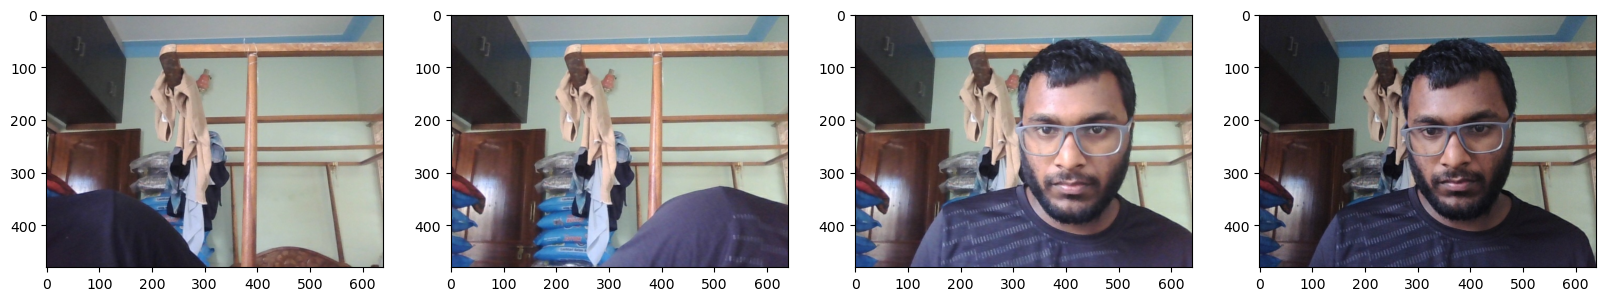

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

### Partition Unaugmented data

manually split data into train test and val

In [18]:
60*.7 #train

42.0

In [21]:
60*.15 # test and validation

9.0

move the matching labels

In [25]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):

        filename = file.split('.')[0]+'.json'
        print(filename)
        existing_filepath = os.path.join('data','labels', filename)
        print(existing_filepath)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            print(new_filepath)
            os.replace(existing_filepath, new_filepath)

01bf95ff-2690-11ed-9961-2811a889e116.json
data\labels\01bf95ff-2690-11ed-9961-2811a889e116.json
04c1db0e-2690-11ed-ad6c-2811a889e116.json
data\labels\04c1db0e-2690-11ed-ad6c-2811a889e116.json
10d91cef-2690-11ed-9754-2811a889e116.json
data\labels\10d91cef-2690-11ed-9754-2811a889e116.json
data\train\labels\10d91cef-2690-11ed-9754-2811a889e116.json
13da9a84-2690-11ed-bc30-2811a889e116.json
data\labels\13da9a84-2690-11ed-bc30-2811a889e116.json
data\train\labels\13da9a84-2690-11ed-bc30-2811a889e116.json
16da09ff-2690-11ed-a9bf-2811a889e116.json
data\labels\16da09ff-2690-11ed-a9bf-2811a889e116.json
data\train\labels\16da09ff-2690-11ed-a9bf-2811a889e116.json
1cd9e452-2690-11ed-aaa9-2811a889e116.json
data\labels\1cd9e452-2690-11ed-aaa9-2811a889e116.json
data\train\labels\1cd9e452-2690-11ed-aaa9-2811a889e116.json
1fd9bb11-2690-11ed-bb7b-2811a889e116.json
data\labels\1fd9bb11-2690-11ed-bb7b-2811a889e116.json
data\train\labels\1fd9bb11-2690-11ed-bb7b-2811a889e116.json
22db1542-2690-11ed-8096-2811

### Apply Image Augmentation on images and labels

In [19]:
import albumentations as alb

In [20]:
img= cv2.imread(os.path.join('data','train','images','2ede71c2-2690-11ed-80f7-2811a889e116.jpg'))

In [21]:
img.shape #width and height shape 

(480, 640, 3)

In [22]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height = 450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',  #here we different formats of bounding boxes like pascal_voc, albumenatations, coco, yolo
                                                 label_fields=['class_labels']))

### Load a Test Image and Annotation with OpenCV and Json

In [23]:
img = cv2.imread(os.path.join('data','train','images','16da09ff-2690-11ed-a9bf-2811a889e116.jpg'))

In [24]:
img

array([[[ 60,  43,  54],
        [ 60,  43,  54],
        [ 61,  44,  55],
        ...,
        [144, 137, 120],
        [142, 136, 117],
        [141, 135, 116]],

       [[ 60,  43,  54],
        [ 60,  43,  54],
        [ 61,  44,  55],
        ...,
        [142, 138, 120],
        [141, 137, 118],
        [140, 136, 117]],

       [[ 57,  42,  50],
        [ 57,  42,  50],
        [ 57,  42,  50],
        ...,
        [141, 139, 121],
        [139, 139, 121],
        [139, 139, 121]],

       ...,

       [[ 97,  68,  61],
        [ 96,  67,  60],
        [ 96,  67,  60],
        ...,
        [ 47,  35,  41],
        [ 48,  36,  42],
        [ 50,  38,  44]],

       [[ 98,  70,  63],
        [ 97,  69,  62],
        [ 96,  68,  61],
        ...,
        [ 46,  31,  39],
        [ 46,  31,  39],
        [ 47,  32,  40]],

       [[ 96,  70,  63],
        [ 95,  69,  62],
        [ 96,  68,  61],
        ...,
        [ 46,  31,  39],
        [ 46,  31,  39],
        [ 47,  32,  40]]

In [25]:
with open(os.path.join('data','train','labels','16da09ff-2690-11ed-a9bf-2811a889e116.json'), 'r') as f:
    label = json.load(f)

In [26]:
label

{'version': '5.0.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[4.608695652173913, 1.6956521739130324], [607, 479]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\16da09ff-2690-11ed-a9bf-2811a889e116.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3e

In [27]:
type(label)

dict

In [28]:
label['shapes']

[{'label': 'face',
  'points': [[4.608695652173913, 1.6956521739130324], [607, 479]],
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}}]

In [29]:
type(label['shapes'])

list

In [30]:
label['shapes'][0]['points']

[[4.608695652173913, 1.6956521739130324], [607, 479]]

#### Extract Co-ordinates and Rescale to match image resolution

In [31]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [32]:
coords

[4.608695652173913, 1.6956521739130324, 607, 479]

In [33]:
coords = list(np.divide(coords,[640,480,640,480])) #4.6/640

In [34]:
coords

[0.007201086956521739, 0.003532608695652151, 0.9484375, 0.9979166666666667]

### Apply Augmentations and View Results

In [35]:
augmented = augmentor(image= img, bboxes=[coords], class_labels=['face'])
augmented

{'image': array([[[196, 169, 179],
         [196, 169, 179],
         [195, 169, 177],
         ...,
         [142, 126, 120],
         [142, 126, 120],
         [142, 127, 119]],
 
        [[191, 167, 176],
         [192, 165, 175],
         [192, 166, 174],
         ...,
         [140, 124, 118],
         [139, 124, 116],
         [138, 125, 117]],
 
        [[191, 167, 176],
         [192, 168, 177],
         [194, 168, 176],
         ...,
         [138, 125, 117],
         [137, 124, 116],
         [138, 125, 117]],
 
        ...,
 
        [[ 56,  28,  34],
         [ 54,  26,  32],
         [ 51,  26,  31],
         ...,
         [ 33,  12,  21],
         [ 35,  14,  23],
         [ 35,  14,  23]],
 
        [[ 50,  22,  28],
         [ 51,  23,  29],
         [ 51,  26,  31],
         ...,
         [ 36,  13,  22],
         [ 38,  15,  24],
         [ 38,  15,  24]],
 
        [[ 43,  15,  21],
         [ 46,  18,  24],
         [ 50,  25,  30],
         ...,
         [ 36,  13,

In [36]:
type(augmented)

dict

In [37]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [38]:
augmented['image'].shape

(450, 450, 3)

In [39]:
augmented['bboxes']

[(0.0, 0.0, 1.0, 1.0)]

In [40]:
augmented['bboxes'][0][2:]

(1.0, 1.0)

In [41]:
augmented['bboxes'][0][:2]

(0.0, 0.0)

In [42]:
augmented['class_labels']

['face']

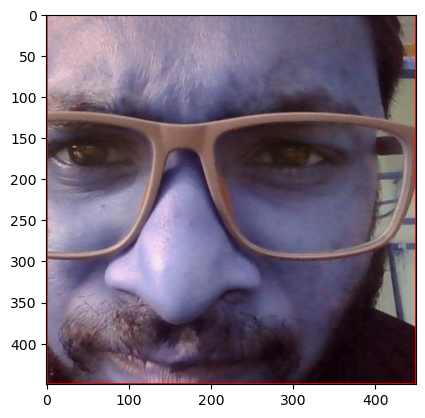

In [43]:
cv2.rectangle(augmented['image'],
             tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
             tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                 (255,0,0), 2)
plt.imshow(augmented['image'])

#### Build and Run Augmentation Pipeline

Run Augmentations Pipeline

In [44]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.2891304347826087, 0.47454710144927525, 0.0046875, 0.9979166666666667, 'face'].
x_max is less than or equal to x_min for bbox [0.5710597826086956, 0.26394927536231877, 0.23817934782608696, 0.9455615942028984, 'face'].
x_max is less than or equal to x_min for bbox [0.4046195652173913, 0.3160326086956521, 0.09042119565217391, 0.8776268115942029, 'face'].


### Load Augmented Images to tensorflow Dataset

In [45]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [46]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [47]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [48]:
train_images.as_numpy_iterator().next()

array([[[0.17107843, 0.17199755, 0.17984068],
        [0.17922795, 0.17175245, 0.19166666],
        [0.20392157, 0.18431373, 0.20784314],
        ...,
        [0.6220588 , 0.6455882 , 0.62990195],
        [0.61991423, 0.64344364, 0.6277574 ],
        [0.6259804 , 0.64460784, 0.6362745 ]],

       [[0.17365196, 0.1740196 , 0.19148284],
        [0.18425246, 0.17990196, 0.19957107],
        [0.19509804, 0.18431373, 0.2112745 ],
        ...,
        [0.62352943, 0.6431373 , 0.627451  ],
        [0.62352943, 0.64270836, 0.62830883],
        [0.6215686 , 0.6378676 , 0.6336397 ]],

       [[0.17579657, 0.171875  , 0.19148284],
        [0.18382353, 0.17990196, 0.20343137],
        [0.18431373, 0.18039216, 0.20392157],
        ...,
        [0.62352943, 0.6431373 , 0.627451  ],
        [0.6279412 , 0.64362746, 0.6397059 ],
        [0.61090684, 0.6314951 , 0.62512255]],

       ...,

       [[0.1254902 , 0.10980392, 0.16862746],
        [0.14411765, 0.12843138, 0.19509804],
        [0.13382353, 0

### Prepare Labels

Build Label loading Function

In [49]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

Load Labels to Tensorflow Dataset

In [50]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [51]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [52]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [53]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

### Combine Label and Images Samples

 Check Partition Lengths

In [54]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(2160, 2160, 540, 540, 540, 540)

### Create Final Datasets(Images/Labels)

In [55]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [56]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [57]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [59]:
train.as_numpy_iterator().next()[0]

array([[[[4.19607848e-01, 4.43137258e-01, 4.43137258e-01],
         [4.23529416e-01, 4.47058827e-01, 4.47058827e-01],
         [4.14705873e-01, 4.38235283e-01, 4.38235283e-01],
         ...,
         [4.21568640e-02, 4.60784324e-02, 5.39215691e-02],
         [4.82230410e-02, 5.21446094e-02, 5.99877462e-02],
         [5.18995114e-02, 5.58210798e-02, 6.36642128e-02]],

        [[4.19607848e-01, 4.43137258e-01, 4.43137258e-01],
         [4.23529416e-01, 4.47058827e-01, 4.47058827e-01],
         [4.20098037e-01, 4.43627447e-01, 4.43627447e-01],
         ...,
         [5.14093153e-02, 5.53308837e-02, 6.31740168e-02],
         [4.65686284e-02, 5.04901968e-02, 5.83333336e-02],
         [4.52205874e-02, 4.63848040e-02, 5.51470593e-02]],

        [[4.08149511e-01, 4.43443626e-01, 4.39522058e-01],
         [4.08762246e-01, 4.44056362e-01, 4.40134794e-01],
         [4.14705873e-01, 4.49999988e-01, 4.46078420e-01],
         ...,
         [5.87622561e-02, 5.87622561e-02, 6.66053891e-02],
         [

In [61]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [58]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.1559 , 0.3916 , 0.4868 , 0.94   ],
        [0.2703 , 0.299  , 0.6494 , 0.816  ],
        [0.     , 0.0743 , 0.598  , 1.     ],
        [0.513  , 0.06616, 0.851  , 0.537  ],
        [0.2139 , 0.     , 0.8394 , 0.7207 ],
        [0.3877 , 0.13   , 0.864  , 0.739  ],
        [0.3657 , 0.07245, 0.9233 , 0.901  ],
        [0.     , 0.10486, 0.3613 , 0.6484 ]], dtype=float16))

### View Images and Annotations

In [77]:
data_samples = train.as_numpy_iterator()

In [78]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


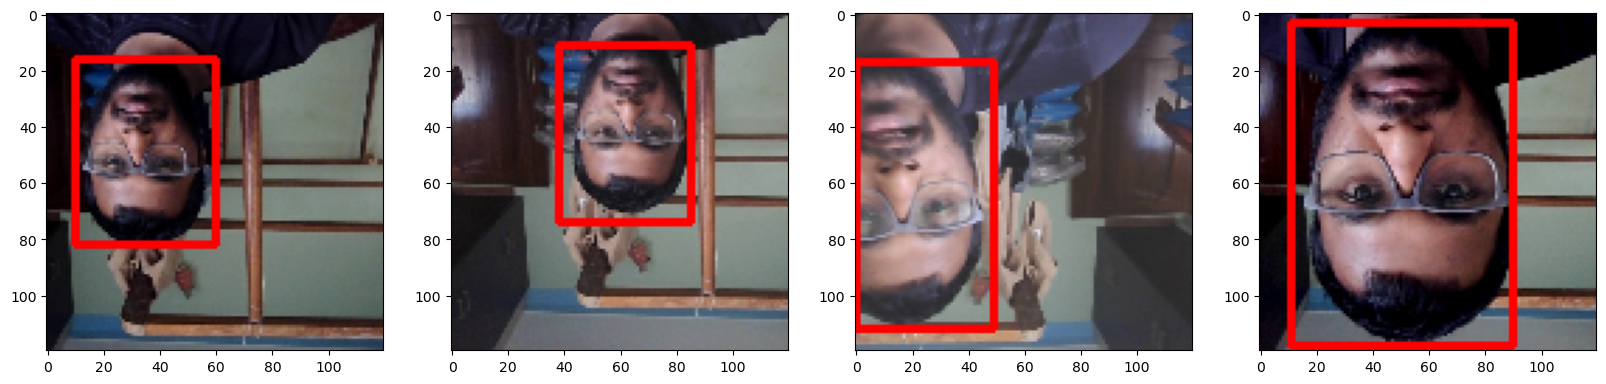

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

### Build Deep Learning using the Functional API

#### import Layers and Base Network

In [80]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

Download VGG16

In [81]:
vgg = VGG16(include_top=False)

58900480/58889256 [==============================] - 165s 3us/step


In [82]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Building Instance Model

In [86]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

Test out Neural Network

In [87]:
facetracker = build_model()

In [88]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_4[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [90]:
X, y = train.as_numpy_iterator().next()

In [91]:
X.shape

(8, 120, 120, 3)

In [92]:
classes, coords = facetracker.predict(X)

In [93]:
classes, coords

(array([[0.43061963],
        [0.3533388 ],
        [0.46152356],
        [0.4682094 ],
        [0.39577675],
        [0.3771925 ],
        [0.4711271 ],
        [0.48402497]], dtype=float32),
 array([[0.6128491 , 0.5611859 , 0.5887897 , 0.66452664],
        [0.6440127 , 0.6490285 , 0.5824453 , 0.5885051 ],
        [0.62141466, 0.6444498 , 0.5943482 , 0.5825726 ],
        [0.57351327, 0.60774285, 0.5773532 , 0.5164149 ],
        [0.6292375 , 0.6654699 , 0.49711612, 0.4515705 ],
        [0.6468007 , 0.588275  , 0.5660692 , 0.47916448],
        [0.54365665, 0.5641435 , 0.5599203 , 0.47528535],
        [0.5097675 , 0.40426987, 0.514764  , 0.5191667 ]], dtype=float32))

### Define Lossess and Optimizers

define Optimizer and LR

In [94]:
len(train)

270

In [97]:
batches_per_epoch = 270
lr_decay = (1./0.75 -1)/batches_per_epoch
lr_decay

0.0012345679012345677

In [98]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

Create Localization loss and Classification Loss

In [99]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [100]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [101]:
regressloss

<function __main__.localization_loss(y_true, yhat)>

In [102]:
classloss

Test out loss Metrics

In [103]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.561848>

In [108]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8493836>

In [105]:
regressloss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=8.561848>

### Train Neural Network

In [109]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [110]:
model = FaceTracker(facetracker)

In [111]:
model.compile(opt, classloss, regressloss)

### Train

In [112]:
logdir ='logs'

In [113]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [114]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
270/270 [==============================] - 66s 133ms/step - total_loss: 0.3173 - class_loss: 0.0595 - regress_loss: 0.2876 - val_total_loss: 5.5464 - val_class_loss: 6.9071 - val_regress_loss: 2.0929
Epoch 2/10
270/270 [==============================] - 33s 112ms/step - total_loss: 0.0227 - class_loss: 2.8035e-04 - regress_loss: 0.0226 - val_total_loss: 7.3368 - val_class_loss: 9.7044 - val_regress_loss: 2.4846
Epoch 3/10
270/270 [==============================] - 32s 110ms/step - total_loss: 0.0137 - class_loss: 9.0321e-05 - regress_loss: 0.0137 - val_total_loss: 9.6001 - val_class_loss: 13.3379 - val_regress_loss: 2.9312
Epoch 4/10
270/270 [==============================] - 32s 111ms/step - total_loss: 0.0088 - class_loss: 4.1294e-05 - regress_loss: 0.0087 - val_total_loss: 8.6758 - val_class_loss: 10.1272 - val_regress_loss: 3.6122
Epoch 5/10
270/270 [==============================] - 32s 112ms/step - total_loss: 0.0063 - class_loss: 2.8046e-05 - regress_loss: 0.0062 - va

In [115]:
hist.history

{'total_loss': [0.043646056205034256,
  0.019939793273806572,
  0.00878700241446495,
  0.010017809458076954,
  0.0038195662200450897,
  0.003402171889320016,
  0.006958199664950371,
  0.005135964602231979,
  0.0030823773704469204,
  0.004691528156399727],
 'class_loss': [0.0002826502895914018,
  0.0001066668628482148,
  9.032348316395655e-05,
  0.00012095772399334237,
  1.3925348866905551e-05,
  1.8112747056875378e-05,
  3.427269916755904e-07,
  1.3180320820538327e-05,
  6.176568604132626e-06,
  1.974485167011153e-05],
 'regress_loss': [0.043504729866981506,
  0.019886460155248642,
  0.008741840720176697,
  0.009957330301404,
  0.0038126036524772644,
  0.0033931154757738113,
  0.0069580283015966415,
  0.005129374563694,
  0.0030792891047894955,
  0.0046816556714475155],
 'val_total_loss': [5.546446800231934,
  7.336798667907715,
  9.600110054016113,
  8.675753593444824,
  10.157587051391602,
  4.548056125640869,
  9.130501747131348,
  6.413427352905273,
  7.950176239013672,
  7.8042259

### Plot Performance

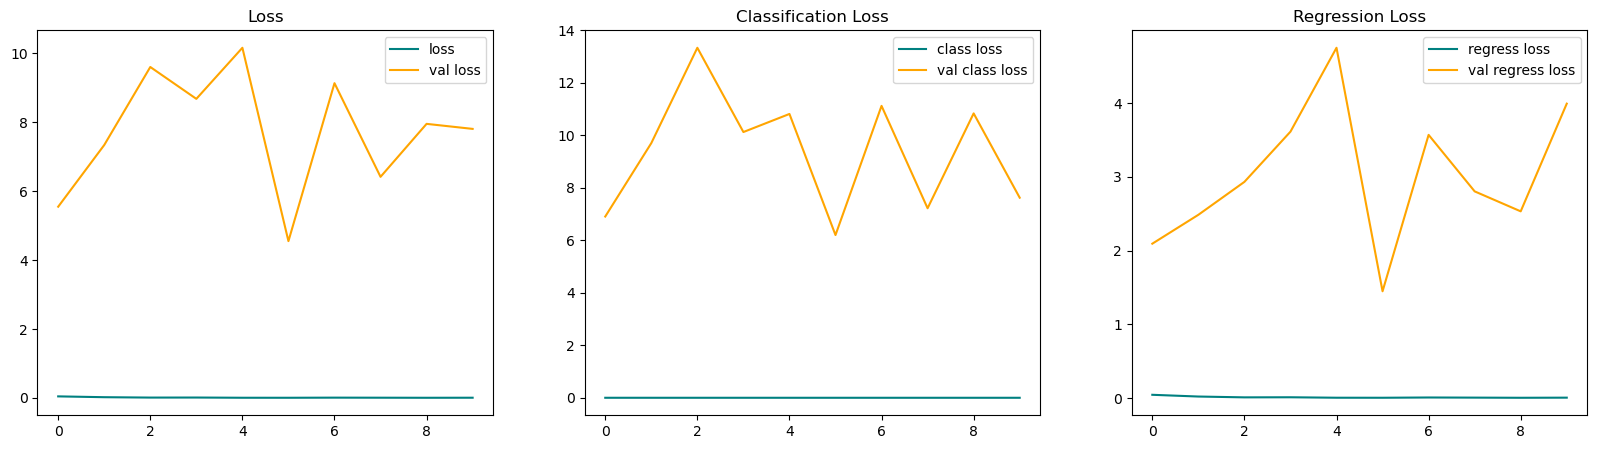

In [116]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

### Make Predictions

Make Predictions on Test Set

In [117]:
test_data = test.as_numpy_iterator()

In [118]:
test_sample = test_data.next()

In [119]:
X, y = test_data.next()

In [120]:
yhat = facetracker.predict(test_sample[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


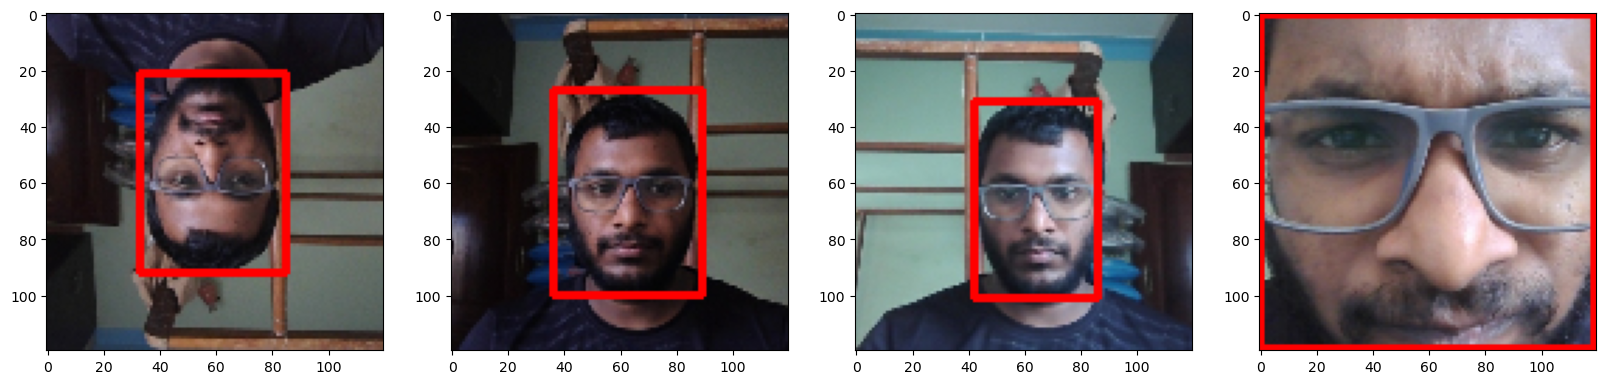

In [121]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### Save the Model

In [122]:
from tensorflow.keras.models import load_model

In [123]:
facetracker.save('facetracker.h5')

In [124]:
facetracker = load_model('facetracker.h5')


### Real Time Detection

In [127]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()